In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle
from matplotlib import style
import matplotlib.pyplot as pyplot

df = pd.read_csv('student-mat.csv', sep=';')

label = 'G3'

x = np.array(df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']])
y = np.array(df[label])


In [13]:
best = 0
for _ in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

    linear = LinearRegression()
    linear.fit(x_train, y_train)
    
    acc = linear.score(x_test, y_test)
    if acc > best:
        best = acc
        with open('student-88%-model.pkl', 'wb') as f:
            pickle.dump(linear, f)


with open('student-88%-model.pkl', 'rb') as f:
    model = pickle.load(f)

In [14]:
predictions = model.predict(x_test)
# print("ضریب: ", model.coef_)
# print("رهگیری: ", model.intercept_)

# print()
# print(best)
# for i in range(len(predictions)):
#     print(predictions[i], x_test[i], y_test[i])

ضریب:  [-0.19477468  0.09700585 -0.16071936  0.1163267  -0.14253035 -0.2207293
  0.37073266  0.06947513 -0.00520646 -0.12011479  0.15705664  0.05737455
  0.04535622  0.16301029  0.98184523]
رهگیری:  -0.6246012233056071

0.9605002717349377
16.815316513127925 [15  4  3  1  2  0  4  5  2  1  1  5  0 17 16] 16
13.489429031264649 [16  2  1  1  1  1  4  4  4  3  5  5  6 12 13] 14
7.074659523379104 [19  1  1  3  1  1  4  4  4  3  3  5  4  8  8] 8
3.376830930144447 [16  3  4  1  2  0  2  4  3  1  2  3 12  5  5] 5
13.923073072591997 [17  4  4  2  3  0  4  3  3  1  2  4  4 14 14] 14
14.470572267729915 [18  3  3  1  2  0  4  1  3  1  2  1  0 15 15] 15
7.659199741110228 [17  1  2  2  2  0  4  4  4  4  5  5 12  7  8] 8
9.246606738933261 [16  4  3  1  1  0  3  1  3  1  3  5  4  8 10] 10
10.496972292699306 [17  3  4  1  3  0  4  3  4  2  5  5  0 11 11] 10
12.221465851986206 [15  2  2  1  1  0  4  2  2  1  2  5  2 12 12] 11
16.611493658626717 [15  4  4  2  1  0  4  3  2  1  1  5  0 16 16] 15
10.688014

ValueError: x and y must be the same size

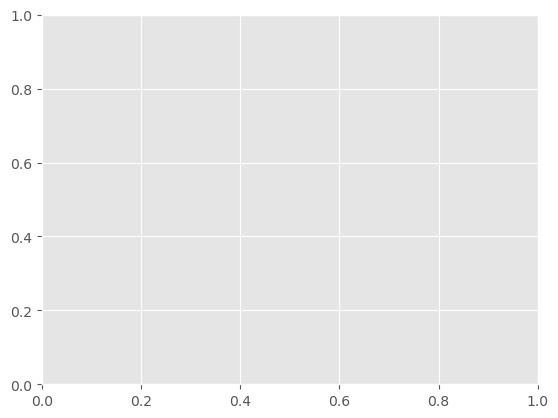

In [20]:
# plotting data
style.use("ggplot")
pyplot.scatter(df['G2'], df[label])
pyplot.ylabel(label)
pyplot.show()